In [1]:
import pandas as pd
import numpy as np

In [2]:
# Intentemos cargar el dataset nuevamente con una codificación diferente que pueda manejar caracteres especiales
try:
    df = pd.read_csv('df10.csv', encoding='ISO-8859-1')
except Exception as e:
    error = e

# Si la carga fue exitosa, mostramos las primeras filas, si no, mostramos el error.
try:
    df_head = df.head()
except NameError:  # Si 'df' no está definido debido a un error anterior, 'df_head' también generará un NameError
    df_head = error

df_head

,Body,Sentiment,Date,Rating
0,Exelente,positive,30/09/2023,5
1,"La peor aplicación de Banca que he usado, te d...",negative,30/09/2023,1
2,Bueno,positive,30/09/2023,5
3,malisima,negative,30/09/2023,1
4,Odio ésta app solo sirve para transferencias p...,negative,30/09/2023,1


In [13]:
# Vamos a comenzar de nuevo, esta vez asegurándonos de que cada paso se pueda ejecutar de manera clara y directa.

# Primero, vamos a importar las bibliotecas necesarias para el preprocesamiento.
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargamos el dataset
df = pd.read_csv('df10.csv', encoding='ISO-8859-1')

# Paso 1: Limpieza de Datos
# Definimos una función que limpie el texto. Esto incluirá la eliminación de etiquetas HTML,
# direcciones de correo electrónico, URLs, y cualquier otro elemento no relevante como números y caracteres especiales.
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Eliminar etiquetas HTML
    text = re.sub(r'\S+@\S+', '', text)  # Eliminar correos electrónicos
    text = re.sub(r'http\S+', '', text)  # Eliminar URLs
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', '', text)  # Eliminar caracteres especiales
    text = text.lower()  # Convertir a minúsculas
    return text

# Aplicamos la función de limpieza al dataframe
df['Clean_Body'] = df['Body'].apply(clean_text)

# Paso 2: Tokenización
# Vamos a dividir el texto en palabras individuales. Esto se puede hacer simplemente con la función split() de Python.
df['Tokens'] = df['Clean_Body'].apply(lambda x: x.split())

# Paso 3: Vectorización
# Utilizaremos TfidfVectorizer de scikit-learn para convertir los comentarios limpios en una matriz TF-IDF.
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Clean_Body'])

# Veremos las dimensiones de la matriz TF-IDF resultante y las primeras palabras del vocabulario para verificar.
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_matrix_shape = tfidf_matrix.shape

(tfidf_matrix_shape, tfidf_feature_names[:10])  # Mostrar las dimensiones y las primeras 10 características.


((249, 952),
 array(['aborrecidos', 'abrir', 'abrí', 'aca', 'acaba', 'acabarla',
        'acabo', 'acceder', 'accesar', 'accesible'], dtype=object))

In [16]:
# Vamos a convertir la matriz TF-IDF en un DataFrame de pandas para un análisis más detallado y fácil interpretación.
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

# Agregamos la columna de sentimiento y la fecha para tener el contexto completo.
tfidf_full_df = pd.concat([df[['Sentiment', 'Date']], tfidf_df], axis=1)

# Mostramos las dimensiones del nuevo DataFrame y las primeras filas para verificar su estructura.
tfidf_full_df_shape = tfidf_full_df.shape
tfidf_full_df_head = tfidf_full_df.head()

(tfidf_full_df_shape, tfidf_full_df_head)  # Mostrar las dimensiones y las primeras filas del DataFrame completo.


((249, 954),
   Sentiment        Date  aborrecidos  abrir  abrí  aca  acaba  acabarla  \
 0  positive  30/09/2023          0.0    0.0   0.0  0.0    0.0       0.0   
 1  negative  30/09/2023          0.0    0.0   0.0  0.0    0.0       0.0   
 2  positive  30/09/2023          0.0    0.0   0.0  0.0    0.0       0.0   
 3  negative  30/09/2023          0.0    0.0   0.0  0.0    0.0       0.0   
 4  negative  30/09/2023          0.0    0.0   0.0  0.0    0.0       0.0   
 
    acabo  acceder  ...  yanomeinportaq  yaorro     yendo   yo      ésta  \
 0    0.0      0.0  ...             0.0     0.0  0.000000  0.0  0.000000   
 1    0.0      0.0  ...             0.0     0.0  0.000000  0.0  0.000000   
 2    0.0      0.0  ...             0.0     0.0  0.000000  0.0  0.000000   
 3    0.0      0.0  ...             0.0     0.0  0.000000  0.0  0.000000   
 4    0.0      0.0  ...             0.0     0.0  0.192436  0.0  0.192436   
 
    ícono  última  últimamente  último  útil  
 0    0.0     0.0       

In [18]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ------------------------------------ 153.3/153.3 kB 831.7 kB/s eta 0:00:00


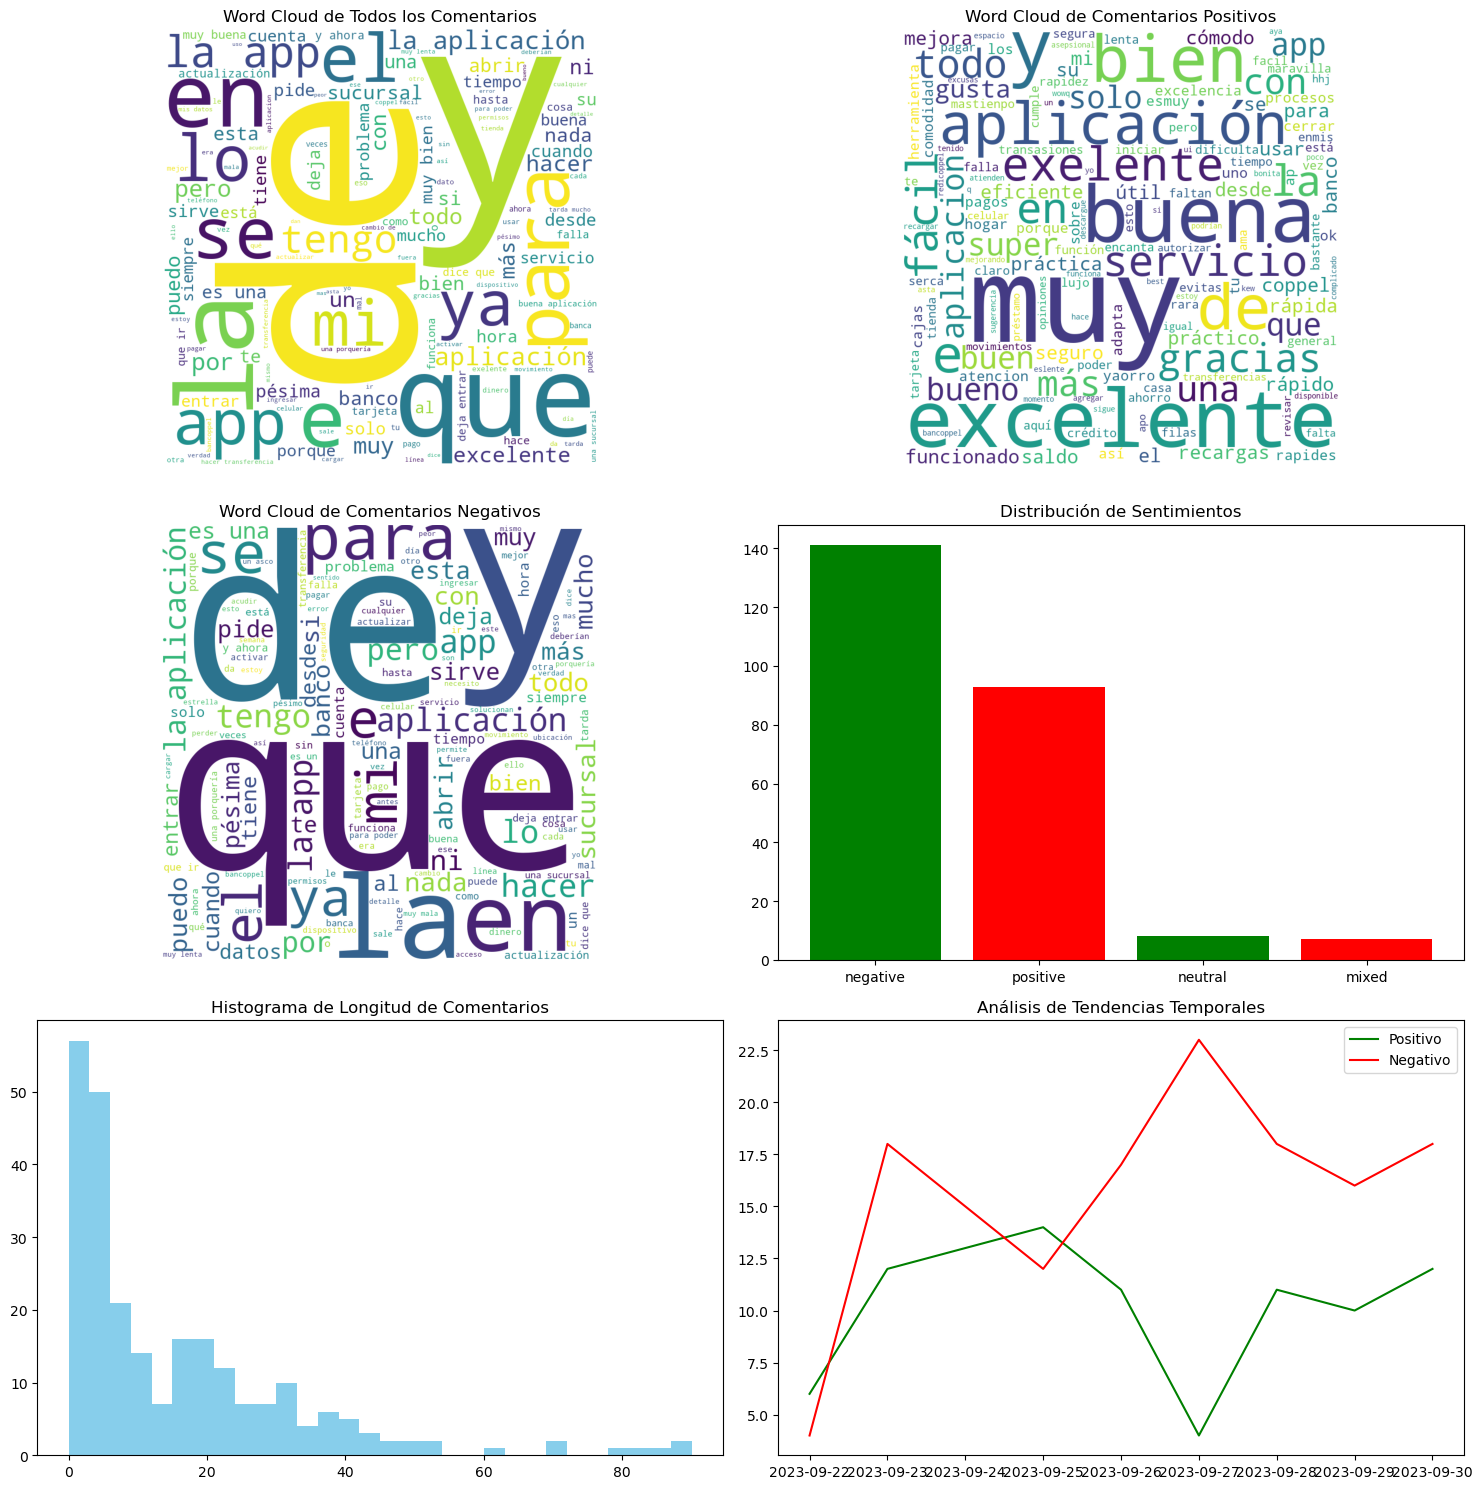

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Configuración de visualización para que aparezcan en una cuadrícula
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Nube de Palabras para todos los comentarios
wordcloud_all = WordCloud(width = 800, height = 800, 
                          background_color ='white', 
                          max_words = 150).generate(' '.join(df['Clean_Body']))

axs[0, 0].imshow(wordcloud_all)
axs[0, 0].axis('off')
axs[0, 0].set_title('Word Cloud de Todos los Comentarios')

# Nube de Palabras para comentarios positivos
positive_comments = df[df['Sentiment'] == 'positive']['Clean_Body']
wordcloud_positive = WordCloud(width = 800, height = 800,
                               background_color ='white',
                               max_words = 150).generate(' '.join(positive_comments))

axs[0, 1].imshow(wordcloud_positive)
axs[0, 1].axis('off')
axs[0, 1].set_title('Word Cloud de Comentarios Positivos')

# Nube de Palabras para comentarios negativos
negative_comments = df[df['Sentiment'] == 'negative']['Clean_Body']
wordcloud_negative = WordCloud(width = 800, height = 800,
                               background_color ='white',
                               max_words = 150).generate(' '.join(negative_comments))

axs[1, 0].imshow(wordcloud_negative)
axs[1, 0].axis('off')
axs[1, 0].set_title('Word Cloud de Comentarios Negativos')

# Distribución de Sentimientos
sentiment_counts = df['Sentiment'].value_counts()
axs[1, 1].bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
axs[1, 1].set_title('Distribución de Sentimientos')

# Histograma de Longitud de Comentarios
comment_lengths = df['Clean_Body'].apply(lambda x: len(x.split()))
axs[2, 0].hist(comment_lengths, bins=30, color='skyblue')
axs[2, 0].set_title('Histograma de Longitud de Comentarios')

# Análisis de Tendencias Temporales
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
positive_trend = df[df['Sentiment'] == 'positive'].groupby('Date').count()['Body']
negative_trend = df[df['Sentiment'] == 'negative'].groupby('Date').count()['Body']
axs[2, 1].plot(positive_trend.index, positive_trend.values, label='Positivo', color='green')
axs[2, 1].plot(negative_trend.index, negative_trend.values, label='Negativo', color='red')
axs[2, 1].legend()
axs[2, 1].set_title('Análisis de Tendencias Temporales')

plt.tight_layout()
plt.show()


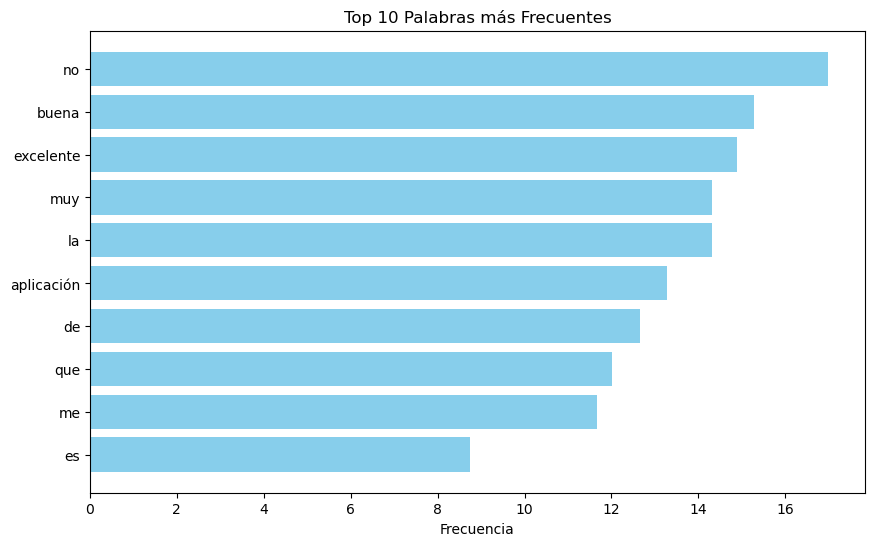

In [20]:
import numpy as np

# Función para calcular las palabras más frecuentes
def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Obtenemos las top 10 palabras más frecuentes en todo el corpus
common_words = get_top_n_words(df['Clean_Body'], 10)
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Gráfico de barras de las palabras más frecuentes
plt.figure(figsize=(10, 6))
plt.barh(common_words_df['Word'], common_words_df['Frequency'], color='skyblue')
plt.xlabel('Frecuencia')
plt.title('Top 10 Palabras más Frecuentes')
plt.gca().invert_yaxis()  # Invertir el eje y para que las barras estén en orden descendente
plt.show()


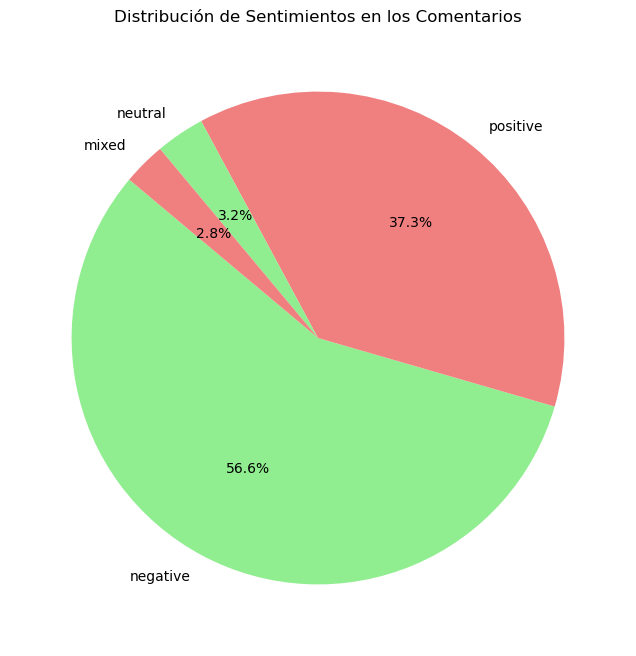

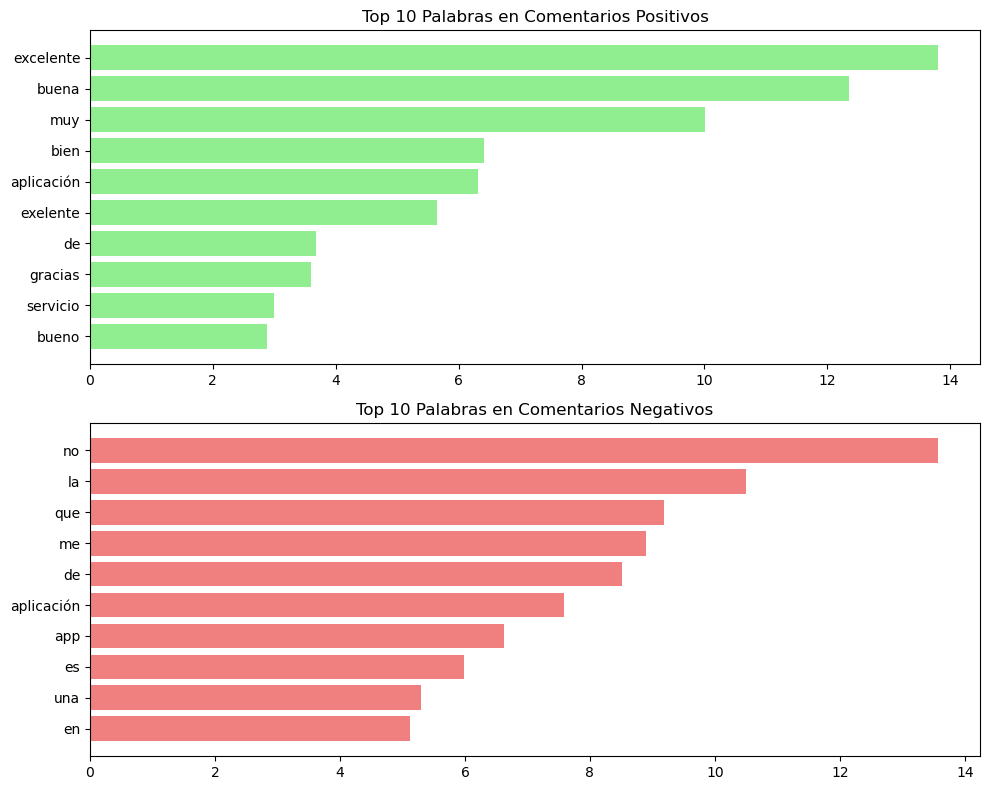

In [21]:
# Para el Análisis Exploratorio de Datos (EDA), vamos a profundizar en la estructura de los datos.
# Comenzaremos con la distribución del sentimiento y luego analizaremos las palabras clave por sentimiento.

# Primero, la distribución del sentimiento.
sentiment_distribution = df['Sentiment'].value_counts(normalize=True)

# Creamos un gráfico de pastel para visualizar la distribución de sentimientos.
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Distribución de Sentimientos en los Comentarios')
plt.show()

# A continuación, buscaremos las palabras más frecuentes por sentimiento.
# Top 10 palabras más frecuentes en comentarios positivos
top_positive_words = get_top_n_words(positive_comments, 10)

# Top 10 palabras más frecuentes en comentarios negativos
top_negative_words = get_top_n_words(negative_comments, 10)

# Convertimos las listas en DataFrames para una mejor visualización.
top_positive_df = pd.DataFrame(top_positive_words, columns=['Word', 'Frequency'])
top_negative_df = pd.DataFrame(top_negative_words, columns=['Word', 'Frequency'])

# Creamos gráficos de barras para las palabras más frecuentes en comentarios positivos y negativos.
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Palabras más frecuentes en comentarios positivos
axs[0].barh(top_positive_df['Word'], top_positive_df['Frequency'], color='lightgreen')
axs[0].set_title('Top 10 Palabras en Comentarios Positivos')
axs[0].invert_yaxis()  # Invertir el eje y para que las barras estén en orden descendente

# Palabras más frecuentes en comentarios negativos
axs[1].barh(top_negative_df['Word'], top_negative_df['Frequency'], color='lightcoral')
axs[1].set_title('Top 10 Palabras en Comentarios Negativos')
axs[1].invert_yaxis()  # Invertir el eje y para que las barras estén en orden descendente

plt.tight_layout()
plt.show()


In [24]:
import seaborn as sns

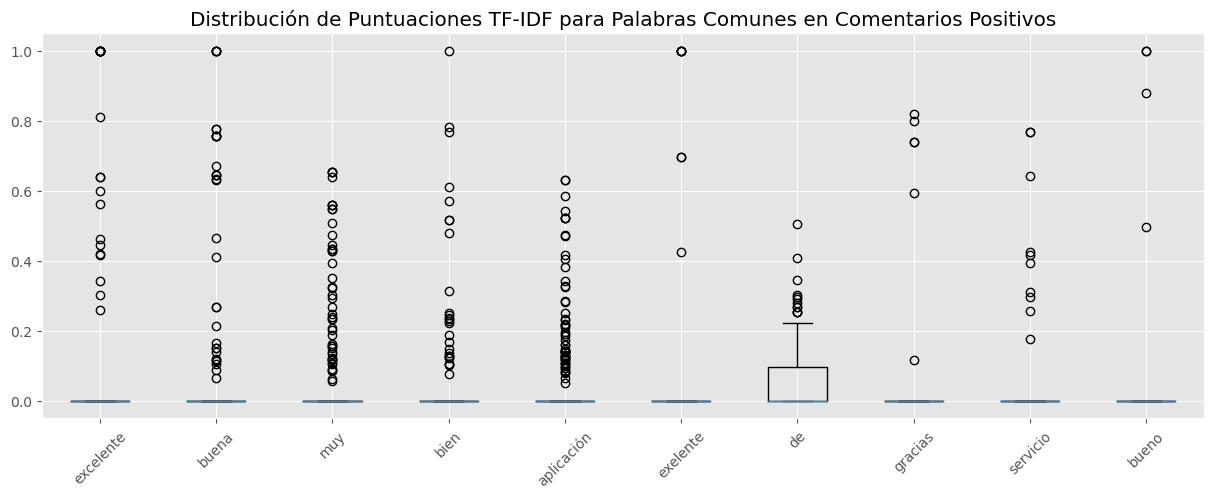

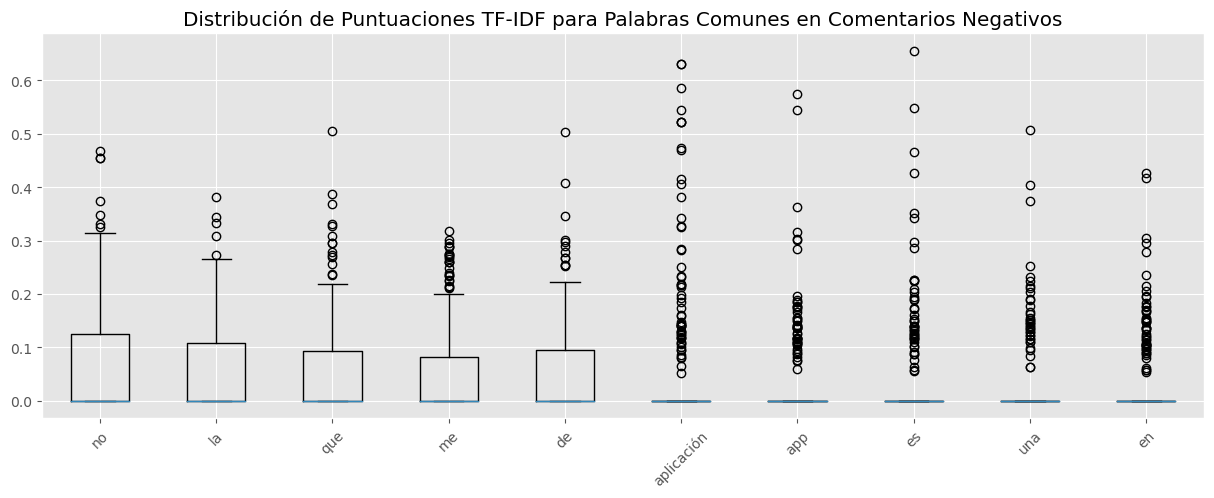

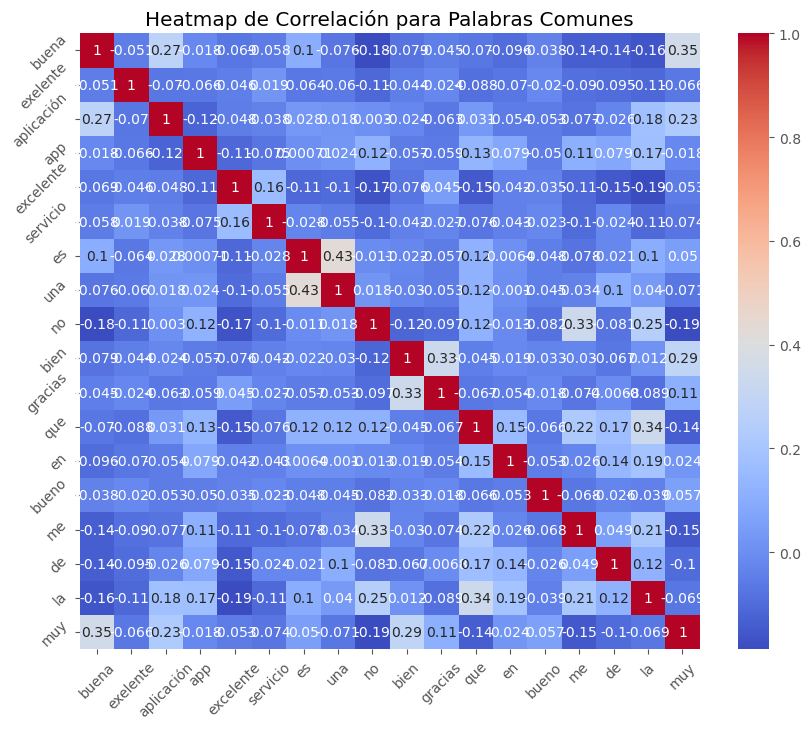

In [25]:
# Para proporcionar visualizaciones adicionales que aporten valor, vamos a realizar lo siguiente:

# 1. Boxplots de las puntuaciones TF-IDF para los términos más comunes en comentarios positivos y negativos.
# Esto nos dará una idea de la distribución de las puntuaciones TF-IDF, que reflejan la importancia de las palabras.

# 2. Heatmap de correlación de las palabras más frecuentes.
# Esto puede mostrar si algunas palabras tienden a aparecer juntas en los comentarios.

# 3. Tendencias temporales de los términos más comunes.
# Podemos ver cómo la frecuencia de las palabras más comunes cambia con el tiempo.

# Configuración de visualización
plt.style.use('ggplot')

# Función para obtener los datos para el boxplot
def get_tfidf_boxplot_data(words, tfidf_matrix, feature_names):
    indices = [feature_names.tolist().index(word) for word in words if word in feature_names]
    data = tfidf_matrix[:, indices].toarray()
    return data, words

# Boxplots de las puntuaciones TF-IDF para los términos más comunes en comentarios positivos
positive_data, positive_words = get_tfidf_boxplot_data([word for word, _ in top_positive_words], tfidf_matrix, tfidf_feature_names)
plt.figure(figsize=(15, 5))
plt.boxplot(positive_data, labels=positive_words)
plt.title('Distribución de Puntuaciones TF-IDF para Palabras Comunes en Comentarios Positivos')
plt.xticks(rotation=45)
plt.show()

# Boxplots de las puntuaciones TF-IDF para los términos más comunes en comentarios negativos
negative_data, negative_words = get_tfidf_boxplot_data([word for word, _ in top_negative_words], tfidf_matrix, tfidf_feature_names)
plt.figure(figsize=(15, 5))
plt.boxplot(negative_data, labels=negative_words)
plt.title('Distribución de Puntuaciones TF-IDF para Palabras Comunes en Comentarios Negativos')
plt.xticks(rotation=45)
plt.show()

# Heatmap de correlación de las palabras más frecuentes (combinando positivas y negativas)
combined_words = list(set(positive_words + negative_words))
combined_data, _ = get_tfidf_boxplot_data(combined_words, tfidf_matrix, tfidf_feature_names)
correlation_matrix = np.corrcoef(combined_data.T)

# Generamos el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, xticklabels=combined_words, yticklabels=combined_words, cmap='coolwarm')
plt.title('Heatmap de Correlación para Palabras Comunes')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


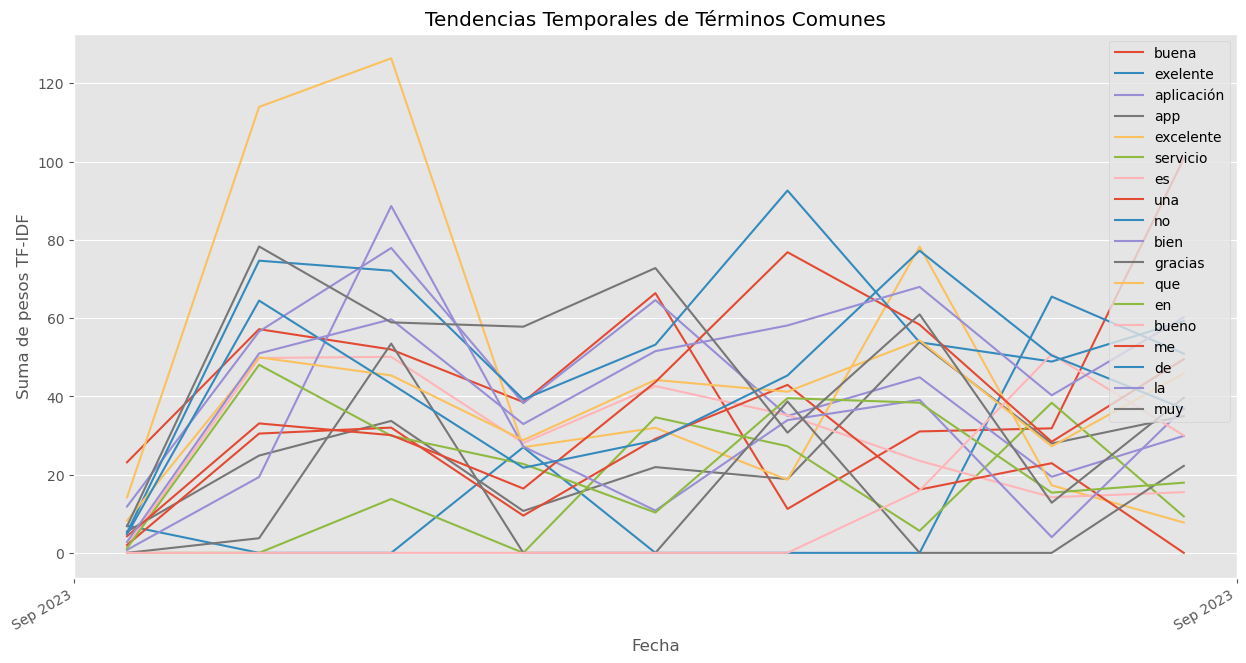

In [26]:
import matplotlib.dates as mdates

# Preparando los datos para la visualización de tendencias temporales de términos comunes
# Agregamos una columna para cada palabra común y su frecuencia por fecha
for word in combined_words:
    # Calcular la suma de los pesos TF-IDF de la palabra para cada fecha
    df[word] = tfidf_full_df.groupby('Date')[word].transform('sum')

# Agrupar por fecha y calcular la suma de los pesos TF-IDF de cada palabra
trends = df.groupby('Date')[combined_words].sum()

# Gráfico de tendencias temporales para los términos más comunes
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(trends.index, trends.values)

# Formato de la fecha en el eje x
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()  # Rotar las fechas para que sean legibles

# Títulos y etiquetas
plt.title('Tendencias Temporales de Términos Comunes')
plt.xlabel('Fecha')
plt.ylabel('Suma de pesos TF-IDF')
plt.legend(trends.columns, loc='upper right')

plt.show()

In [35]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Carga el conjunto de datos (asumiendo que 'df' es tu DataFrame y que ya has realizado la limpieza de texto)
# Intentemos cargar el dataset nuevamente con una codificación diferente que pueda manejar caracteres especiales
try:
    df = pd.read_csv('df10.csv', encoding='ISO-8859-1')
except Exception as e:
    error = e

# Si la carga fue exitosa, mostramos las primeras filas, si no, mostramos el error.
try:
    df_head = df.head()
except NameError:  # Si 'df' no está definido debido a un error anterior, 'df_head' también generará un NameError
    df_head = error

df_head

# Asegúrate de que las columnas 'Body' y 'Sentiment' no tengan valores nulos
df.dropna(subset=['Body', 'Sentiment'], inplace=True)

# Vectorización TF-IDF
# Inicializa el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Aplica la vectorización al cuerpo de los comentarios limpios
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Body'].values.astype('U')) # 'U' indica Unicode

# Verifica si hay valores NaN o infinitos en la matriz TF-IDF
if np.isnan(tfidf_matrix.data).any():
    print("Hay valores NaN en la matriz TF-IDF")
if np.isinf(tfidf_matrix.data).any():
    print("Hay valores infinitos en la matriz TF-IDF")

# Reemplaza los valores infinitos con NaN
tfidf_matrix.data = np.where(np.isinf(tfidf_matrix.data), np.nan, tfidf_matrix.data)

# Imputa los valores NaN con la media de la columna (esto no debería ser necesario para una matriz TF-IDF, pero lo incluimos por precaución)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
tfidf_matrix = imputer.fit_transform(tfidf_matrix)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, 
    df['Sentiment'], 
    test_size=0.2, 
    random_state=42
)

# Crear y entrenar el clasificador Naive Bayes dentro de un pipeline
# El pipeline incluye la imputación de valores faltantes y el clasificador
pipeline = make_pipeline(SimpleImputer(strategy='mean'), MultinomialNB())
pipeline.fit(X_train, y_train)

# Predecir el sentimiento en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.73      1.00      0.84        27
     neutral       0.00      0.00      0.00         3
    positive       1.00      0.65      0.79        20

    accuracy                           0.80        50
   macro avg       0.58      0.55      0.54        50
weighted avg       0.79      0.80      0.77        50



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk

# Asegurarse de que las stopwords de NLTK estén disponibles
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el conjunto de datos desde el archivo CSV
df = pd.read_csv('df10.csv', encoding='ISO-8859-1')

# Función para limpiar los textos
def clean_text(text):
    # Eliminar etiquetas HTML
    text = re.sub(r'<[^>]*>', '', text)
    # Eliminar URLs
    text = re.sub(r'http\S+', '', text)
    # Eliminar caracteres especiales y dígitos
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', '', text)
    # Convertir el texto a minúsculas
    text = text.lower()
    return text

# Limpieza de los datos
df['Clean_Body'] = df['Body'].apply(clean_text)

# Normalización de texto y eliminación de palabras vacías
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer('spanish')

def normalize_text(text):
    # Tokenizar el texto
    words = word_tokenize(text)
    # Eliminar palabras vacías y aplicar stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['Normalized_Body'] = df['Clean_Body'].apply(normalize_text)

# Vectorización del texto
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Normalized_Body'].values.astype('U'))  # 'U' para Unicode

# Inicializar y ajustar el modelo LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)  # Ajusta el número de temas según sea necesario
lda.fit(X)

# Mostrar los temas y sus palabras clave
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Tema {topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

# Asignar a cada comentario un tema dominante
topic_results = lda.transform(X)
df['Tema_Dominante'] = topic_results.argmax(axis=1)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jose.lozas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jose.lozas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tema 1:
dej aplic pued si hac funcion pas ultim cuent transfer
Tema 2:
tard buen aplic tiemp pag hac bien si realiz carg
Tema 3:
aplic hac sucursal activ pesim servici bien pid entrar funcion
Tema 4:
buen aplic app sucursal abrir pag ahor banc hac cambi
Tema 5:
quier sac lent pesim app facil tard segur carg vec
Tema 6:
bien exelent porqu aplicacion graci app sirv error entrar dej
Tema 7:
aplic app pued funcion mejor entrar abrir pesim fall dej
Tema 8:
app dic pued hor hac mal sol activ banc pod
Tema 9:
excelent app hac dat sucursal ahor servici this dic intent
Tema 10:
app asco sucursal pid bien dat ahor aplic solucion oper


In [41]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk

# Descarga las stopwords de NLTK si no las tienes localmente
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el conjunto de datos
df = pd.read_csv('df10.csv', encoding='ISO-8859-1')

# Función para limpiar los textos
def clean_text(text):
    # Eliminar caracteres especiales y dígitos
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', ' ', text)
    # Convertir el texto a minúsculas
    text = text.lower()
    # Eliminar espacios en blanco adicionales
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Función para eliminar stopwords
def remove_stopwords(text):
    spanish_stopwords = stopwords.words('spanish')
    words = word_tokenize(text)
    words = [word for word in words if word not in spanish_stopwords]
    return ' '.join(words)

# Función para realizar stemming
def stem_text(text):
    stemmer = SnowballStemmer('spanish')
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

# Aplicar limpieza y preprocesamiento al texto
df['Clean_Body'] = df['Body'].apply(clean_text).apply(remove_stopwords).apply(stem_text)

# Vectorización del texto preprocesado
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Clean_Body'])

# Modelo LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Mostrar los temas y sus palabras clave
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Tema {topic_idx+1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))  # Las 10 palabras más importantes por tema

# Asignar a cada comentario un tema dominante
df['Tema_Dominante'] = lda.transform(X).argmax(axis=1)

# Guardar los resultados en un nuevo archivo CSV
df.to_csv('df10_con_temas.csv', index=False)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jose.lozas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jose.lozas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tema 1:
aplic sucursal hac banc si problem exelent pued dej mism
Tema 2:
bien funcion aplic porqu siempr facil excelent graci usar fall
Tema 3:
aplic pesim excelent app abrir pued hac tard tiemp servici
Tema 4:
app ahor banc hac sucursal activ dej entrar hor cambi
Tema 5:
buen entrar app dej hac bien tard carg sol pued
